# Car price in auction, Which feature matter more?

# Dataset

The dataset is about car price in auction.It contains about 558,811 data points and 16 features .
The features are:
- year: The year of production
- make: the brand of the car
- model: eddition name of the car
- trim: the level or the virsion of the model
- body: body type or the style of the vehicle 
- transmission: transmission type( Automatic, Manual)
- vin: Vehicle identification number 
- state: the state where the car is auctioned
- condition: the rating of the car at the time of the auction(5=excellent, 4=very good, 3=good, 2=fair, 1=poor )
- odometer: the distance traveled by a vehicle
- color:  exterior color of the car
- interior: interior color of the car
- seller: the seller of the car , or the car dealer
- mmr: Manheim Market Report is the estimated price of the car in the market whch is done by Manheim company and it is refereshed every night in order to provide accurate price
- sellingprice: the price of the car when it was sold at the auction
- saledate: the date when the car was sold at auction


# Problem 

- What are the main features that affect the price of used car?
- What is the relation between odometer & selling price?
- Should the seller trust MMR (Manheim Market Report)?
- What are the most color available in used car market
- Which state has more used car for sale?




# Importing libraries 

In [94]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt             #visualisation
import seaborn as sns                       #visualisation

import statsmodels.api as sm
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



%matplotlib inline

# Read and understand data

In [30]:
pwd

'C:\\Users\\M'

In [31]:
#read the data from csv file 
df = pd.read_csv('c://Users//M//car_prices.csv',error_bad_lines=False,warn_bad_lines=True)

C:\Users\M\anaconda3\envs\metis\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\M\anaconda3\envs\metis\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw

In [32]:
#making copy of the dataset in variable named cardf
cardf = df.copy()

In [33]:
#display the first 5 rows of the data 
cardf.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [34]:
#display the last 5 rows of the data 
cardf.tail(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558810,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,3.4,15008.0,gray,gray,"ford motor credit company,llc pd",29600,26700,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


# Inspect the dataset  ( Data cleaning ) 

### Displying details about the dataset

In [35]:
# display a summary of a the DataFrame
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


### Print out the number of rows and columns

In [36]:
#get number of rows/observations
print ("Number of Rows     : " , cardf.shape[0])  

#get number of columns
print ("Number of Columns  : " , cardf.shape[1])

Number of Rows     :  558811
Number of Columns  :  16


### Checking for missing values

In [37]:
# checking the misssing values 
print ("#"*25,"\nMissing values :\n\n", cardf.isnull().sum().sort_values(ascending=False))

# looking at columns with most Missing Values
print( "#"*25,"\nPercent of missing :\n\n", round(cardf.isna().sum() / cardf.isna().count() * 100, 2))


######################### 
Missing values :

 transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
interior          749
odometer           94
year                0
vin                 0
state               0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64
######################### 
Percent of missing :

 year             0.00
make             1.84
model            1.86
trim             1.91
body             2.36
transmission    11.70
vin              0.00
state            0.00
condition        2.11
odometer         0.02
color            0.13
interior         0.13
seller           0.00
mmr              0.00
sellingprice     0.00
saledate         0.00
dtype: float64


### Removing the rows with missing values 
deleting rows with missing values probalbly won't affect the result since the dataset is large

In [38]:
cardf = cardf.dropna() 

#recheck on rows with missing values after deletion 
print(cardf.isnull().sum()) 

#check the number of the rows after the deletion
print ("\nNumber of Rows after processing the missing values: " , cardf.shape[0])  

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

Number of Rows after processing the missing values:  472336


### Checking for duplictae rows 

In [40]:
duplicate_rows_df = cardf[cardf.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape[0])

number of duplicate rows:  0


### Count the Unique values in each column

In [41]:
#count of unique values
print ("\nUnique values :  \n\n", cardf.nunique()) 


Unique values :  

 year                26
make                53
model              768
trim              1507
body                85
transmission         2
vin             465779
state               34
condition           41
odometer        160427
color               20
interior            17
seller           11927
mmr               1099
sellingprice      1806
saledate          3609
dtype: int64


### Deleting Irrelevent columns 

In [42]:
cardf = cardf.drop(['trim','interior', 'seller'], axis=1)
cardf.head(5)

,year,make,model,body,transmission,vin,state,condition,odometer,color,mmr,sellingprice,saledate
0,2015,Kia,Sorento,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


### Change the values of State column into Upper case 

In [43]:
cardf.state = cardf.state.str.upper()
cardf.state

0         CA
1         CA
2         CA
3         CA
4         CA
          ..
558805    FL
558807    WA
558808    CA
558809    GA
558810    CA
Name: state, Length: 472336, dtype: object

# EDA

In [44]:
cardf.describe()

,year,condition,odometer,mmr,sellingprice
count,472336.000000,472336.000000,472336.000000,472336.000000,472336.000000
mean,2010.211045,3.426576,66701.070003,13836.999773,13690.403670
std,3.822131,0.943659,51939.183430,9532.131753,9612.962279
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,2.700000,28137.000000,7425.000000,7200.000000
50%,2012.000000,3.600000,51084.000000,12300.000000,12200.000000
75%,2013.000000,4.200000,96589.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


#### observations
- year of make range from 1990 to 2015
- the car condition average is 3.4 
- tha odometer average is about 66,000 km
- the mmr and sellingprice seems to be very close in statical values 


C:\Users\M\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


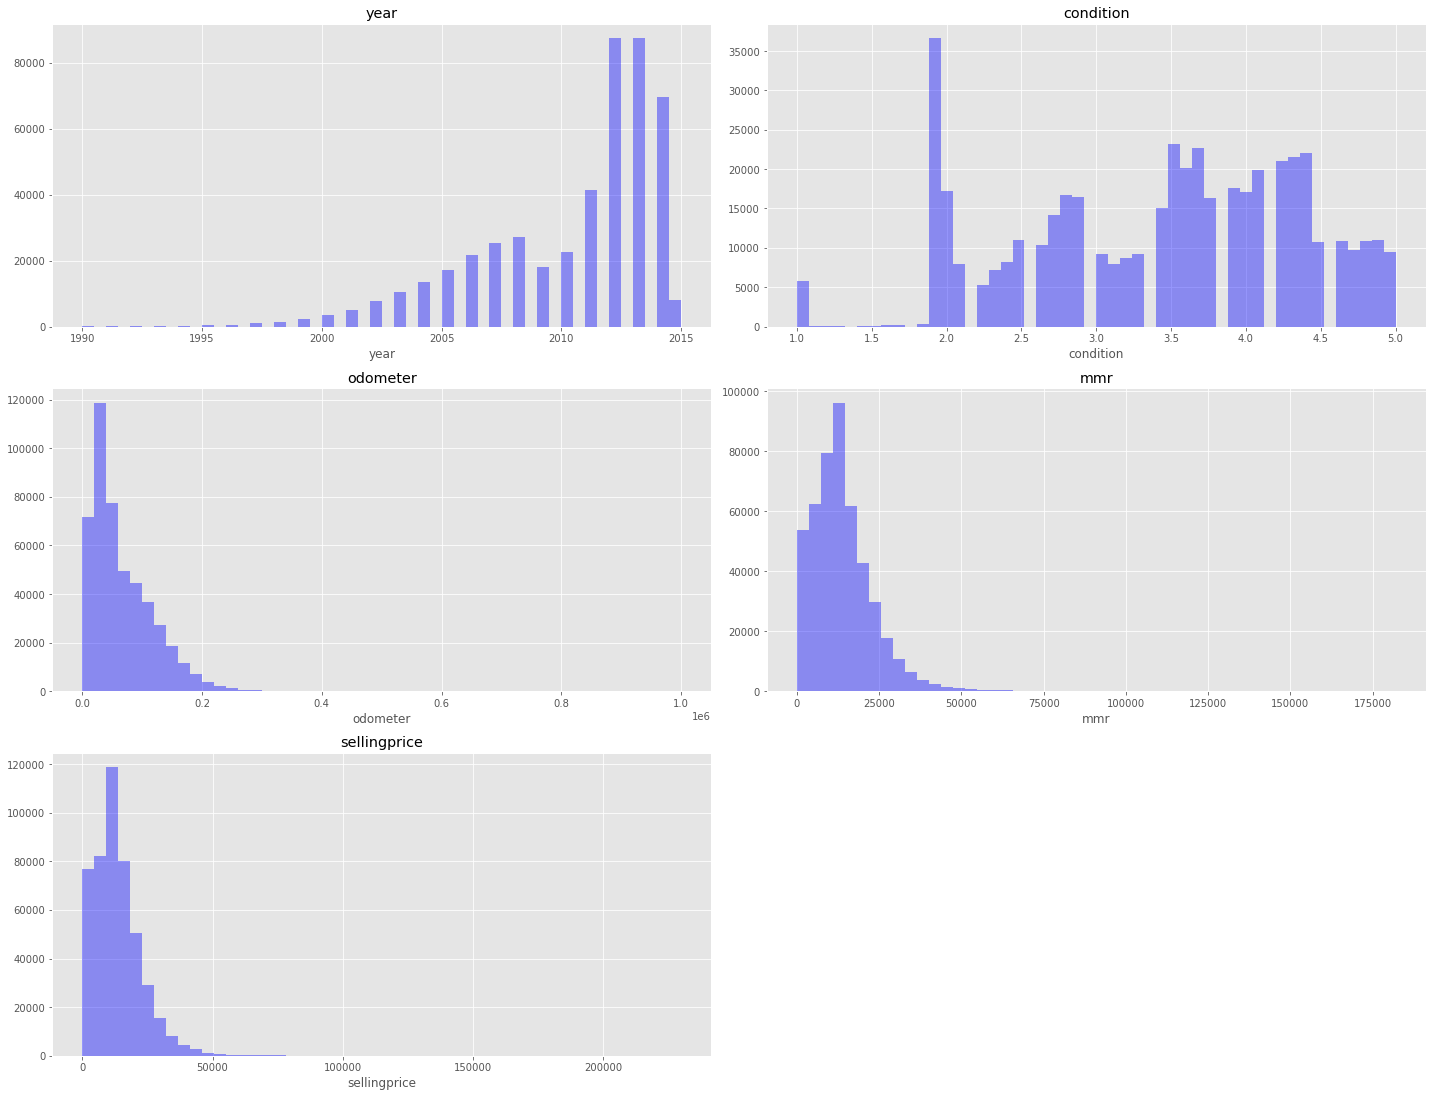

In [45]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = cardf.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                       
                     sns.distplot(cardf[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

### observation
- year has some outliers
- odometer has right skewed 
- selling price has right skewed 


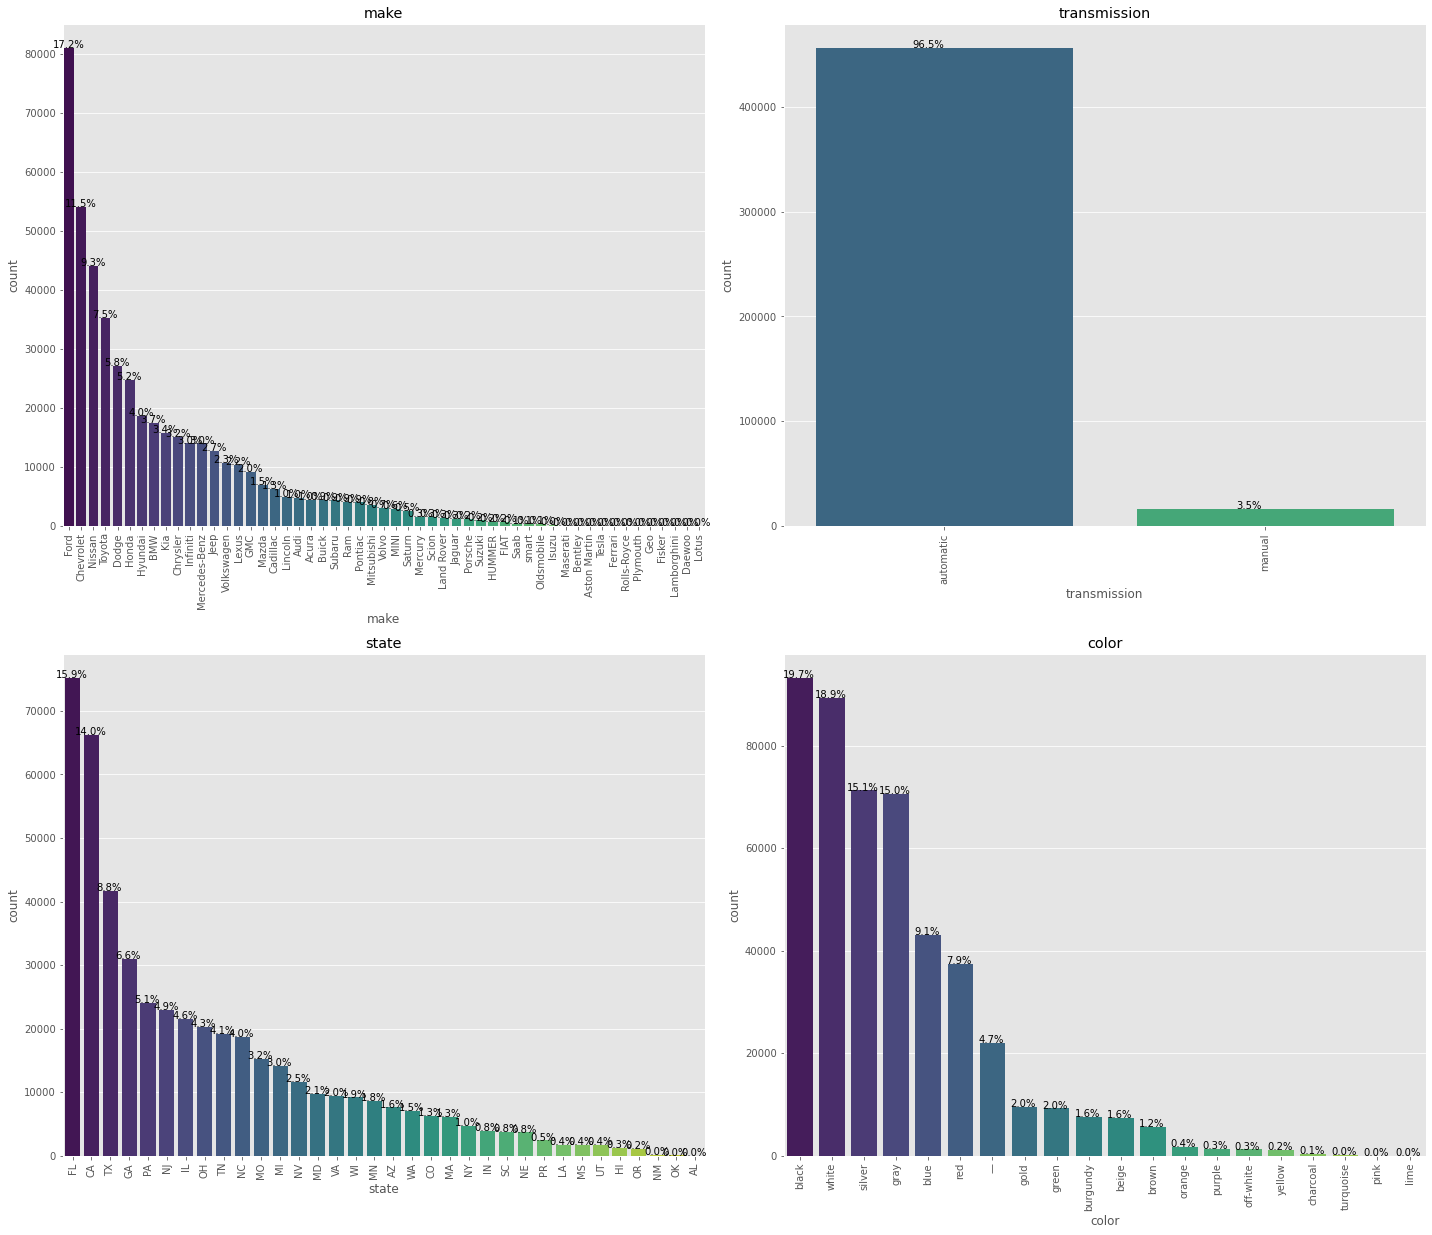

In [46]:
cat_columns=['make','transmission','state', 'color'] 
plt.figure(figsize=(20,25))

for i, variable in enumerate(cat_columns):
                     plt.subplot(3,2,i+1)
                     order = cardf[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=cardf[variable], data=cardf , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(cardf[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)
                

### Observation
- ~97 % of the used car in the auction have manual Transmission.
- ~50% of the used car in the auction are one of these brand: Ford, Chevrolete, Nissan, Toyota 
- black, white, silver, and gray represent ~70% of the used car color in the auction
- Florida, California, and Texas  have highest numbers of used car availabe for purchase

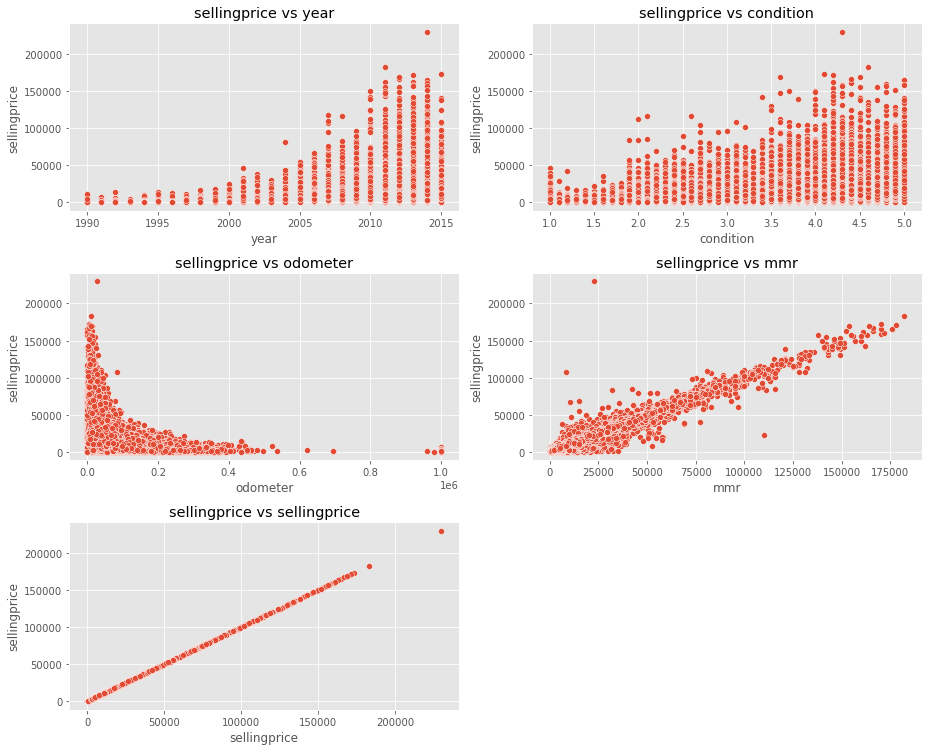

In [47]:
numeric_columns= numeric_columns = cardf.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=cardf[variable],y=cardf['sellingprice']).set(title='sellingprice vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

From the previous plot it is clear that there is a strong correlation between the MMR and selling price . So, MMR can be trustable since it gives the right sellingprice most of the time . However, in this project to calculate the prediction of the used car price it is imortant to ignore the MMR as one of the feature that affect the selling price

### Heatmap plot

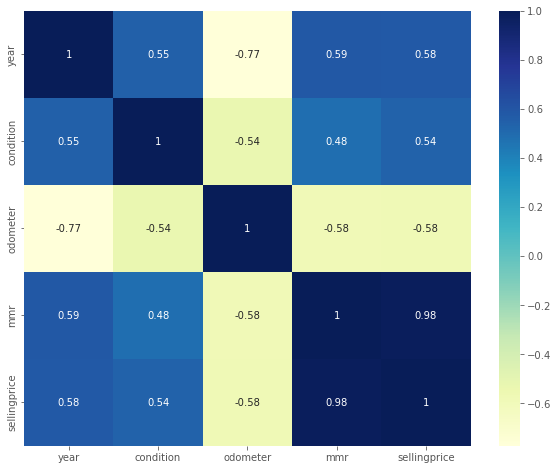

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(cardf.corr(),annot=True ,cmap="YlGnBu" )
plt.show()

### Observation
- sellingprice has positive correlation with year of make and the condition of the car
- sellingprice has negative correlation with odometer
- odometer has negative correlation with condition and year of make 

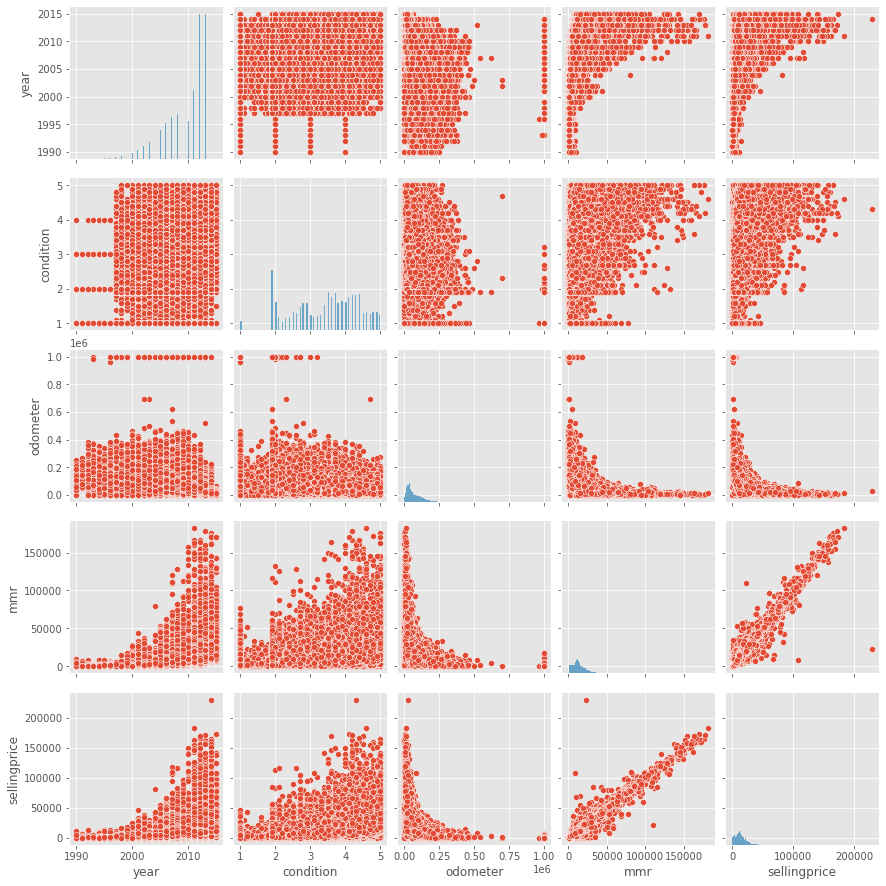

In [49]:
sns.pairplot(cardf)


### check and process the skewed distribution

C:\Users\M\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


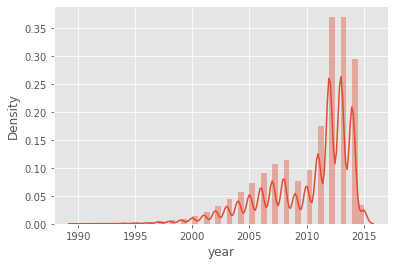

C:\Users\M\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


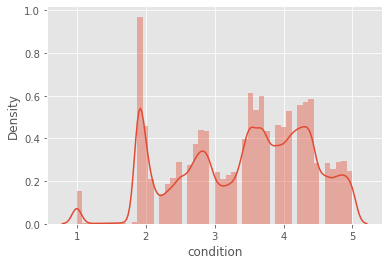

C:\Users\M\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


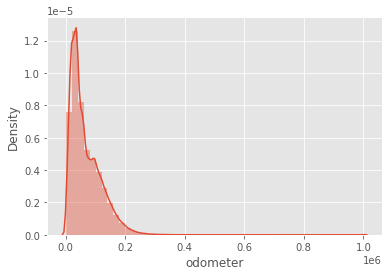

C:\Users\M\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


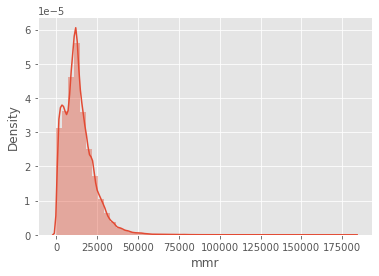

C:\Users\M\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


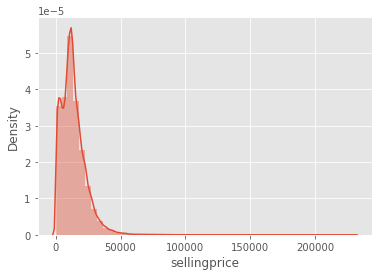

In [50]:
# first chech the skewed distribution
cols_to_log = cardf.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(cardf[colname], kde=True)
    plt.show()

Since there are right skewed in the distribution of sellingprice and odometer , log transform will be used to help in normalize them

In [51]:
# applying log transfrom on sellingprice and odometer
cardf['sellingprice_log'] = np.log(df['sellingprice'])
cardf['odometer_log'] = np.log(df['odometer'])    
cardf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472336 entries, 0 to 558810
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              472336 non-null  int64  
 1   make              472336 non-null  object 
 2   model             472336 non-null  object 
 3   body              472336 non-null  object 
 4   transmission      472336 non-null  object 
 5   vin               472336 non-null  object 
 6   state             472336 non-null  object 
 7   condition         472336 non-null  float64
 8   odometer          472336 non-null  float64
 9   color             472336 non-null  object 
 10  mmr               472336 non-null  int64  
 11  sellingprice      472336 non-null  int64  
 12  saledate          472336 non-null  object 
 13  sellingprice_log  472336 non-null  float64
 14  odometer_log      472336 non-null  float64
dtypes: float64(4), int64(3), object(8)
memory usage: 73.8+ MB


# Building the Model:
### First model OLS regression  

In [71]:

choosed_cols = ['year','condition','odometer','sellingprice',
                'transmission','state','color',
                'sellingprice_log','odometer_log']

ff=cardf[choosed_cols].copy()


In [72]:
ff.dtypes

year                  int64
condition           float64
odometer            float64
sellingprice          int64
transmission         object
state                object
color                object
sellingprice_log    float64
odometer_log        float64
dtype: object

In [79]:
cat_cols = ff.select_dtypes(include=['object']).columns
ff_1 = pd.get_dummies(ff[cat_cols],dummy_na=False,prefix_sep='_',drop_first=True)
ff_2 = ff.drop(cat_cols,axis=1)

gf= ff_1.merge(ff_2,left_index=True,right_index=True)
gf.head()

,transmission_manual,state_AZ,state_CA,state_CO,state_FL,state_GA,state_HI,state_IL,state_IN,state_LA,...,color_turquoise,color_white,color_yellow,color_—,year,condition,odometer,sellingprice,sellingprice_log,odometer_log
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,2015,5.0,16639.0,21500,9.975808,9.719505
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,2015,5.0,9393.0,21500,9.975808,9.147720
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,2014,4.5,1331.0,30000,10.308953,7.193686
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,2015,4.1,14282.0,27750,10.230991,9.566755
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,2014,4.3,2641.0,67000,11.112448,7.878913


In [74]:
X.shape

(472336, 59)

In [80]:
X = gf.drop(["sellingprice", "sellingprice_log"], axis=1)
y = gf[["sellingprice_log", "sellingprice"]]



In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)
X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (330635, 57)
X_test: (141701, 57)
y_train: (330635, 2)
y_test: (141701, 2)


In [116]:
# Statsmodel api does not add a constant by default. We need to add it explicitly.
X_train = sm.add_constant(X_train)
# Add constant to test data
X_test = sm.add_constant(X_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["sellingprice_log"], train)
    return olsmodel.fit()

In [117]:
#fit statmodel
olsmodel1 = build_ols_model(X_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:       sellingprice_log   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                 1.331e+04
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:22:31   Log-Likelihood:            -2.3285e+05
No. Observations:              330635   AIC:                         4.658e+05
Df Residuals:                  330577   BIC:                         4.664e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -205.3723    

In [118]:

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Training set:  0.5720958922856099
Accuracy on Testing set:  0.5740017635035997


In [122]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["sellingprice"]

    # Prediction on test data
    y_pred_test_pricelog = olsmodel.predict(x_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["sellingprice"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )
model_pref(olsmodel1, X_train, X_test) 

    Data         RMSE          MAE       MAPE
0  Train  7297.202851  4692.986075  48.201141
1   Test  7318.650664  4708.765519  43.150044
